## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [311]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [312]:
csv_file = "ab_data.csv"
df2 = pd.read_csv(csv_file)
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

>We can see the number of rows with the ".info()" function.

In [313]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


c. The number of unique users in the dataset.

>Running the ".nunique" function we can find the number of non duplicate rows.

In [314]:
unique = df2.user_id.nunique
unique()

290584

d. The proportion of users converted.

>If want to know the proportion of converted from the total of users we should find it using the number of unique users.

In [315]:
prop = df2.agg("converted")
prop.sum()/unique()

0.12126269856564711

e. The number of times the `new_page` and `treatment` don't line up.

>To answer this question we can use the "len()" function. 

In [316]:
len(df2[(df2["group"] == "treatment") == (df2["landing_page"] == "old_page")]) 


3893

f. Do any of the rows have missing values?

>As we saw running the ".info()" function all the data are available and there are no missing data.

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

>We should remove these rows.

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [317]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


In [318]:
df2 = df2[(df2.group == "treatment") == (df2.landing_page == "new_page")]
df2

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1
5,936923,2017-01-10 15:20:49.083499,control,old_page,0
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1
7,719014,2017-01-17 01:48:29.539573,control,old_page,0
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1


In [319]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290585 entries, 0 to 294477
Data columns (total 5 columns):
user_id         290585 non-null int64
timestamp       290585 non-null object
group           290585 non-null object
landing_page    290585 non-null object
converted       290585 non-null int64
dtypes: int64(2), object(3)
memory usage: 13.3+ MB


In [320]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

>There are 290584 unique users id in df2

b. There is one **user_id** repeated in **df2**.  What is it?

>Using the .value_counts() function related to the "user_id" we can find the repetead rows.

In [321]:
df2["user_id"].value_counts()

773192    2
630732    1
811737    1
797392    1
795345    1
801490    1
799443    1
787157    1
793302    1
817882    1
842446    1
815835    1
805596    1
803549    1
809694    1
807647    1
895712    1
840399    1
836301    1
899810    1
834242    1
936604    1
934557    1
940702    1
938655    1
830144    1
828097    1
832195    1
838348    1
821956    1
         ..
734668    1
736717    1
730574    1
775632    1
771538    1
642451    1
773587    1
783828    1
785877    1
779734    1
781783    1
759256    1
726472    1
748999    1
746950    1
753093    1
751044    1
740803    1
738754    1
744897    1
742848    1
634271    1
632222    1
636316    1
630169    1
650647    1
648598    1
654741    1
652692    1
630836    1
Name: user_id, Length: 290584, dtype: int64

>The user_id repeated is the 773192

c. What is the row information for the repeat **user_id**? 

>To find the repeated user_id we run the .duplicated() function in connection to the user_id column. 

In [322]:
df2[df2.duplicated("user_id")]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

>To drop this row from the dataframe we should select the ".drop()" function. It´s important to code "inplace = True" to keep the changes for future calculations

In [323]:
df2.drop([2893], axis=0, inplace = True)

>I have removed the row from the dataframe and I checked, if the removing has run efficiently:

>We can check if the changes has been done if we call the ".duplicate()" function again and we should obtain an empty dataframe.

In [324]:
df2[df2.duplicated("user_id")]

,user_id,timestamp,group,landing_page,converted


>Yes, calling all the duplicated rows returns me an empty query

`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

>If we look to the propability we should calculate the proportion of rows with "converted" in relation to the total of rows using the following expression:  

In [325]:
len(df2[df2.converted==1])/len(df2)

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

>For calculating the probability it will be helpful to have a look on the converted colum and split this column in converted and not converted and split again these two populations again in their "groups" ("treatment" or "control")

In [326]:
prop = df2.groupby(["converted","group"])
prop.count()

user_id  timestamp  landing_page
converted group                                      
0         control     127785     127785        127785
          treatment   128046     128046        128046
1         control      17489      17489         17489
          treatment    17264      17264         17264

>Once we have an overall look of these subcategories we can have a deeper understanding and how to manage it. For answering our question we can follow the Bayes Rule.

>Our prior is that the probability of converted or not converted is equal, so that we have P(0,5) for converted and for not converted.
P(converted) = 0,5

>The overall control population is 145.274, of this control population 17.489 are converted.
P(converted / control) = 17.489 / 145.274 = 0,1204
P(not converted / treatment) = 128.046 / 145310 = 0,8812

>So that following the rule P(converted/control) = (P (converted / control)*P(converted)) / P(converted) 

>P(converted/control) = (P(17.489 / 145274)*(0,5)) / (0,5) = 0,1204

>Now I calculate this in Python as follows:

>First we obtain the control population (pop_con):

In [327]:
pop_con = len(df2[df2.group == "control"])
pop_con

145274

>Second we want to know the treatment population (pop_treat):

In [328]:
pop_treat = len(df2[df2.group == "treatment"])
pop_treat

145310

>Third, we know need the converted population:

In [329]:
pop_tot_cv = len(df2[df2.converted == 1])
print(pop_tot_cv)

34753


>Fourth, we have to look how is this population classified concerning the group to which they belong. In this first step the converted from the control population:

In [330]:
pop_cont_con = len(df2[(df2["group"] == "control") & (df2["converted"] == 1)]) 
pop_cont_con

17489

>In this second step the not converted from the treatment population:

In [331]:
pop_treat_con = len(df2[(df2["group"] == "treatment") & (df2["converted"] == 1)])
pop_treat_con

17264

>Now what we all what we need to do is to calculate what I describe above

In [332]:
prob_conv_cont = ((pop_cont_con / pop_con)*0.5) / 0.5
prob_conv_cont

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

>For this second question we proceed the same way changing the group. The prior is the same as before. The probability of converted or not converted is agian equal, so that we have P(0,5) for converted and for not converted.
P(converted) = 0,5

>The overall control population is 145.310, of this control population 17.264 are converted.
P(converted / treatment) = 17.264 / 145.310 = 0,1188
P(not converted / control) = 127.785 / 145.274 = 0,8796

>So that following the rule P(converted/control) = (P (converted / control)*P(converted)) / P(converted) 

>P(converted/control) = (P(17.264 / 145.310)*(0,5)) / (0,5) = 0,1188

>Now I calculate this in Python as follows:

In [333]:
prop_conv_treat = ((pop_treat_con / pop_con)*0.5) / 0.5
prop_conv_treat

0.1188375070556328

d. What is the probability that an individual received the new page?

>To find the probability that a individual received the new page we should know how many user received the new_page. For doing this we use the "len()" function in relation to the "landing_page" column and looking only to the "new_page" 

In [334]:
new_page = len(df2[(df2["landing_page"] == "new_page")])
new_page

145310

>Then we look one more time for the total of "user_id´s" as we did before.

In [335]:
total_user_id = unique()
total_user_id

290584

>Finally, we divide the number of user that received the new_page and divide it to the total number of "users".

In [336]:
prob_new_page = new_page / total_user_id
prob_new_page

0.5000619442226688

e. Use the results in the previous two portions of this question to suggest if you think there is evidence that one page leads to more conversions?  Write your response below.

>By analysing the results obtained looking for the probability of a page leading to more conversions, we find that there is a 50% of probability for each page to leads to more conversions. Therefore we can suggest that there is no clear evidencde that one page leads to more conversions.

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

>Null Hypothesis (0): New page receives less or equal traffic than the old page.

>$p_{new}$=< $p_{old}$.


>Alternative Hypothesis (1): New page receives more traffic than the old page.

>$p_{new}$ > $p_{old}$.

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

>As we saw before the total amount of converted people was load in the variable pop_tot_cv:

In [337]:
pop_tot_cv

34753

>And the total population was load as unique:

In [338]:
unique()

290584

a. What is the **convert rate** for $p_{new}$ under the null? 

>We can find the converted rate for $p_{new}$ under the null dividing converted population (pop_tot_cv) by the total population (unique()).

In [339]:
con_rate_pnew = pop_tot_cv/unique()
con_rate_pnew

0.11959708724499628

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

>As $p_{new}$ and $p_{old}$ are equal. The converted rate $p_{old}$ under the null should be equal too.

In [340]:
con_rate_pold = con_rate_pnew
con_rate_pold

0.11959708724499628

c. What is $n_{new}$?

>$n_{new}$ continues to represent the same value as we saw before and we stored it as new_page

In [341]:
n_new = new_page
n_new

145310

d. What is $n_{old}$?

>And we could define $n_{old}$ as the total population minus the new page population, also as: $n_{old}$ = unique() - n_new

In [342]:
n_old = unique() - n_new
n_old

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

>We can simulate this using bootstraping a sample set of data and compute the sample mean again and again.

>Let´s start with looking for the new page.

In [343]:
new_page_df = df2.query('landing_page == "new_page"')

In [344]:
new_page_converted= new_page_df.query('converted == True').user_id.nunique() / new_page_df.query('converted == False').user_id.nunique()

In [345]:
new_page_converted

0.13482654670977617

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

>Now we can do the same for the old page.

In [346]:
old_page_df = df2.query('landing_page =="old_page"')

In [347]:
old_page_converted = old_page_df.query('converted == True').user_id.nunique() / old_page_df.query('converted == False').user_id.nunique()

In [348]:
old_page_converted

0.13686269906483547

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

>In this case we can calculate the difference in the rate as follows:

In [349]:
obs_diff = new_page_converted - old_page_converted
obs_diff

-0.002036152355059301

>The observed difference is higher for the old page, but near zero. We have the observed if this difference is due to chance or not. We can do the simulations as asked in part h.

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in **p_diffs**.

>Now we run a simulation taking into account the difference in proportions.

In [350]:
p_diffs = []
for _ in range(10000):
    new_page_converted = np.random.binomial(n_new, con_rate_pnew)
    old_page_converted = np.random.binomial(n_old, con_rate_pold)
    diff = new_page_converted/n_new - old_page_converted/n_old
    p_diffs.append(diff)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

In [351]:
low, upper = np.percentile(p_diffs, 2.5), np.percentile(p_diffs, 97.5)

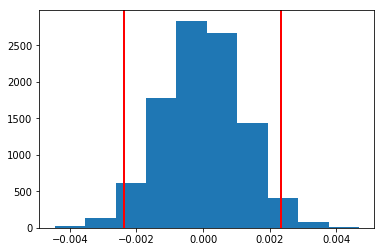

In [352]:
plt.hist(p_diffs);
plt.axvline(x=low, color ="r", linewidth=2)
plt.axvline(x= upper, color ="r", linewidth=2);

>Now we can compute the p-value of the statistic. 

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

>We can simulate the distribution under the null hypothesis, by creating a random normal distribution centered at 0 with the same spread and size finding the probability that the statistic came from this distribution.

In [353]:
p_diffs = np.array(p_diffs)
null_vals = np. random.normal(0, p_diffs.std(), p_diffs.size)

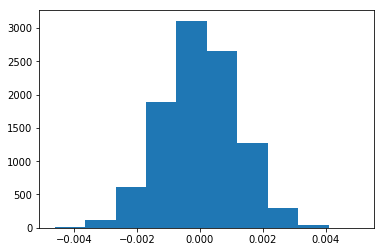

In [354]:
plt.hist(null_vals);

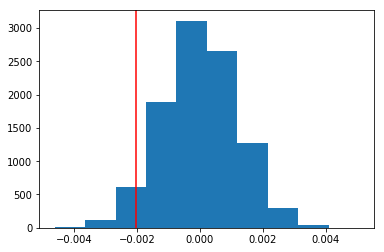

In [355]:
plt.hist(null_vals);
plt.axvline(x=obs_diff, color ="r");

In [356]:
(null_vals>obs_diff).mean()

0.9577

In [357]:
diff_obs = prop_conv_treat-prob_conv_cont
diff_obs

-0.0015487974448284009

In [358]:
(null_vals>diff_obs).mean()

0.90390000000000004

k. In words, explain what you just computed in part **j.**.  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

>What we want to know is the p-value. For doing this we simulate from the null. First of all we create a normal distribution centered at zero. What we get is a p-value higher than 0.95. We see all the null values that are more extreme than the alternative. With a p-value of 95% the difference from a conversion from a new page user and an old page user doesn´t appear to be significant. It looks like it´s not such a good idea to launch the new version of the page.

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [359]:
convert_new = df2.query("landing_page == 'new_page' and converted == 1").shape[0]
n_new = df2.query("landing_page == 'new_page'").shape[0]
convert_old = df2.query("landing_page == 'old_page' and converted == 1").shape[0]
n_old = df2.query("landing_page == 'old_page'").shape[0]

In [360]:
import statsmodels.api as sm
from statsmodels.stats.proportion import proportions_ztest

In [361]:
n_old

145274

In [362]:
n_new

145310

In [363]:
convert_old

17489

In [364]:
convert_new

17264

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [365]:
z_score, p_value = proportions_ztest([convert_new, convert_old ], [n_new,n_old], alternative = "larger")
z_score

-1.3109241984234394

In [366]:
p_value

0.90505831275902449

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

>The z-score represents the number of the standard deviation from the mean. In this case is lower than the 2,5. The p-value represents the probability that the null hypothesis is true, so that in this case is a very weak evidence of rejecting null hypothesis in both cases. These results supports the data provided in parts **j.** and **k.**.

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the previous A/B test can also be achieved by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

>The type of regression needed for this part is the logistic prediction. This type of prediction is useful for only two possible outcomes. In this case the conversion or not.

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

>For achieving the goal to use the statsmodel to fit the regression we need to create a dummy column "ab_page".
For doing this we will use the ".get_dummies()" function.

In [367]:
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [368]:
df2[["treatment", "control"]] = pd.get_dummies(df2["group"])

>Then we remove the column "treatment" with the ".drop()" function, as we only need one of them.

In [369]:
df2 = df2.drop("treatment", axis=1)

>And we change the column label "control" to "ab_page" using the ".rename" function.

In [370]:
df2 = df2.rename(columns ={"control":"ab_page"})

d. Provide the summary of your model below, and use it as necessary to answer the following questions.

>We can display the header of the model like this:

In [371]:
df2.head()

,user_id,timestamp,group,landing_page,converted,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,0


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [372]:
df2["intercept"] = 1
logit_mod = sm.Logit(df2["converted"], df2[["intercept","ab_page"]])
results = logit_mod.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Fri, 22 Jun 2018   Pseudo R-squ.:               8.077e-06
Time:                        12:47:11   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

In [373]:
np.exp(-0.0150)

0.98511193960306265

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in Part II?

>The p-value concerning ab_page is 0.190. The closest the p-value to zero the more reliable. So that in this case the result for the intercept suggest that is statistically more significant than the ab_page. These values differs from our findings in Part II, because in part II we were using on tailed test and in this case we are using two tailed test.

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

>We can observe what kind of actions have the user done in the web and compare the parts of the web that have caused more conversion than the others. Maybe there are other factor like the sociodemographic elements than brings to more or less conversion (age, gender, studies).

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - Provide the statistical output as well as a written response to answer this question.

>First of all I import the "countries.csv" file and display the header to see how it is configurated. Using the ".head()" function to obbserve the structure and ".info()" to see if they are missing values.

In [374]:
csv_file2 = "countries.csv"
df3 = pd.read_csv(csv_file2)
df3.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [375]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290584 entries, 0 to 290583
Data columns (total 2 columns):
user_id    290584 non-null int64
country    290584 non-null object
dtypes: int64(1), object(1)
memory usage: 4.4+ MB


>The next step is to merge the two files taking care that we join it taking into account the user_id as index to merge the right country with the right user.

In [376]:
df2.head()

,user_id,timestamp,group,landing_page,converted,ab_page,intercept
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,0,1


In [377]:
df4 = df2.set_index("user_id").join(df3.set_index("user_id"))

>Now we have merged the two dataframes together. We can display the header.

In [378]:
df4.head()

,timestamp,group,landing_page,converted,ab_page,intercept,country
user_id,,,,,,,
851104,2017-01-21 22:11:48.556739,control,old_page,0,0,1,US
804228,2017-01-12 08:01:45.159739,control,old_page,0,0,1,US
661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US
853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US
864975,2017-01-21 01:52:26.210827,control,old_page,1,0,1,US


In [379]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290584 entries, 851104 to 715931
Data columns (total 7 columns):
timestamp       290584 non-null object
group           290584 non-null object
landing_page    290584 non-null object
converted       290584 non-null int64
ab_page         290584 non-null uint8
intercept       290584 non-null int64
country         290584 non-null object
dtypes: int64(2), object(4), uint8(1)
memory usage: 25.8+ MB


>Now we have to check how many countries are displayed in the dataset using the ".groupby" function.

In [380]:
countries_grouped = df4.groupby(["country"])
countries_grouped.count()

,timestamp,group,landing_page,converted,ab_page,intercept
country,,,,,,
CA,14499,14499,14499,14499,14499,14499
UK,72466,72466,72466,72466,72466,72466
US,203619,203619,203619,203619,203619,203619


>And what we realize is that they are users from three different countries. So that we need to convert these three different categorical options into three different dummies variables, like we did before. 

In [381]:
df4[["CA","UK","US"]] = pd.get_dummies(df4["country"])
df4.head()

,timestamp,group,landing_page,converted,ab_page,intercept,country,CA,UK,US
user_id,,,,,,,,,,
851104,2017-01-21 22:11:48.556739,control,old_page,0,0,1,US,0,0,1
804228,2017-01-12 08:01:45.159739,control,old_page,0,0,1,US,0,0,1
661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US,0,0,1
853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US,0,0,1
864975,2017-01-21 01:52:26.210827,control,old_page,1,0,1,US,0,0,1


>Once we did this, we code again the statsmodel with CA and UK as variables, leaving US as the intercept.

In [382]:
df4["intercept"] = 1
logit_mod = sm.Logit(df4["converted"], df4[["intercept","CA","UK"]])
results = logit_mod.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Fri, 22 Jun 2018   Pseudo R-squ.:               1.521e-05
Time:                        12:47:12   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1984
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9967      0.007   -292.314      0.000      -2.010      -1.983
CA            -0.0408      0.027     -1.518      0.129      -0.093       0.012
UK             0.0099      0.013      0.746      0.456      -0.016       0.036
==============================================================================
"""

In [383]:
np.exp(-0.0408)

0.96002111497165088

In [384]:
np.exp(0.0099)

1.0099491671175422

>What we observe here is that the baseline is marked by the intercept in this case USA. And we can exponetiate both other results (Canada and UK) to compare it to the USA who is the baseliner.

>What we see here is that for user of Canada we can expect that for a unit of increase the conversion is 0.96 times as likely holding all else constant.

>And for the UK we can say that we expect that for each unit of increase the conversion is 1.01 times as likely holding all else constant.

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

>What is proposed here is to multiply the dummy variable created with each country with the "ab_page" dummy variable.

In [385]:
df4.head()

,timestamp,group,landing_page,converted,ab_page,intercept,country,CA,UK,US
user_id,,,,,,,,,,
851104,2017-01-21 22:11:48.556739,control,old_page,0,0,1,US,0,0,1
804228,2017-01-12 08:01:45.159739,control,old_page,0,0,1,US,0,0,1
661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US,0,0,1
853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US,0,0,1
864975,2017-01-21 01:52:26.210827,control,old_page,1,0,1,US,0,0,1


In [386]:
df4['UK_ab_page'] = df4['UK']*df4['ab_page']
df4['US_ab_page'] = df4['US']*df4['ab_page']
df4['CA_ab_page'] = df4['CA']+df4['ab_page']

In [387]:
df4.head()

,timestamp,group,landing_page,converted,ab_page,intercept,country,CA,UK,US,UK_ab_page,US_ab_page,CA_ab_page
user_id,,,,,,,,,,,,,
851104,2017-01-21 22:11:48.556739,control,old_page,0,0,1,US,0,0,1,0,0,0
804228,2017-01-12 08:01:45.159739,control,old_page,0,0,1,US,0,0,1,0,0,0
661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US,0,0,1,0,1,1
853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US,0,0,1,0,1,1
864975,2017-01-21 01:52:26.210827,control,old_page,1,0,1,US,0,0,1,0,0,0


In [388]:
df4["intercept"] = 1
logit_mod = sm.Logit(df4["converted"], df4[["intercept","UK_ab_page","CA_ab_page"]])
results = logit_mod.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366111
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Fri, 22 Jun 2018   Pseudo R-squ.:               2.884e-05
Time:                        12:47:12   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                   0.04652
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9862      0.008   -245.201      0.000      -2.002      -1.970
UK_ab_page     0.0300      0.018      1.649      0.099      -0.006       0.066
CA_ab_page    -0.0251      0.011     -2.271      0.023      -0.047      -0.003
==============================================================================
"""

>What we see here is the probability of conversion if the country is neither UK nor Canada (in this case should be USA linked to the control .


In [389]:
np.exp(-1.9862), np.exp(0.0300), np.exp(-0.0251)

(0.13721585625450233, 1.0304545339535169, 0.97521238591351689)

In [390]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0